<a href="https://colab.research.google.com/github/akashqchem/Machine_Learning_Clustering_Models/blob/main/Hierarchical_Clustering_Airplane_Crashes_Analysis/Airplane_Crash_Data_Hierarchical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing all the necessary libraries

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Importing our dataset 'Airplane_Crashes_Data.csv'

In [97]:
dataset = pd.read_csv("Airplane_Crashes_Data.csv")
x = dataset.iloc[:, 9:12].values
missing_data = dataset.isnull().sum()

#Printing all the features (x) & missing_data if available

In [98]:
print(x)
print(missing_data)

[[  2.   1.   0.]
 [  5.   5.   0.]
 [  1.   1.   0.]
 ...
 [228. 228.   0.]
 [  1.   1.   0.]
 [ 13.  13.   0.]]
Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1707
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64


#Taking care of missing_data

In [99]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
x[:, 0:3] = imputer.fit_transform(x[:, 0:3])

In [100]:
print(x)

[[  2.   1.   0.]
 [  5.   5.   0.]
 [  1.   1.   0.]
 ...
 [228. 228.   0.]
 [  1.   1.   0.]
 [ 13.  13.   0.]]


#Rechecking if there are any missing_values left to impute

In [101]:
x = pd.DataFrame(x)
print(x.isnull().sum())
# Converting x to a pandas DataFrame to use isnull().sum() (not available for NumPy arrays).
# This prints the number of missing values in each column.

0    0
1    0
2    0
dtype: int64


#Converting all the values back to numpy array because feature scaling expect input data in numpy array format

In [102]:
x = x.values

#Applying feature scaling (Standardisation)

In [103]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x[:, 0:2] = sc.fit_transform(x[:, 0:2])

In [104]:
print(x)

[[-0.59453207 -0.57505728  0.        ]
 [-0.52473634 -0.45442625  0.        ]
 [-0.61779732 -0.57505728  0.        ]
 ...
 [ 4.66341293  6.27075401  0.        ]
 [-0.61779732 -0.57505728  0.        ]
 [-0.3386144  -0.21316418  0.        ]]


#Using the dendrogram to find the optimal number of clusters

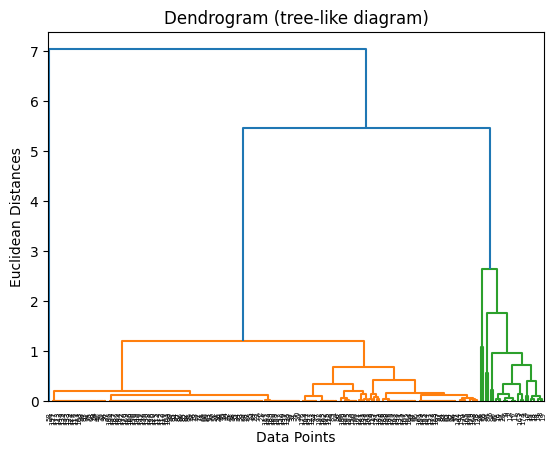

In [105]:
x_sample = x[:200] # Using a smaller sample because dendrograms are hard to read with large datasets
import scipy.cluster.hierarchy as sch # This will import hierarchical clustering functions from the SciPy library
dendrogram = sch.dendrogram(sch.linkage(x_sample, method = 'ward')) # This will display the dendrogram visualisation
plt.title("Dendrogram (tree-like diagram)")
plt.xlabel("Data Points")
plt.ylabel('Euclidean Distances')
plt.show()

#Training and assigning the Hierarchical (Agglomerative) Clustering model after determining the optimal number of clusters

In [106]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, linkage = 'ward') # Building the Agglomerative Hierarchical Clustering model
y_pred = hc.fit_predict(x) # Fitting the model and assigning cluster labels (optimal clusters = 2)

In [107]:
print(y_pred)

[0 0 0 ... 0 0 0]


# Congratulations! We are done with our Unsupervised Hierarchical Clustering machine learning model.
